In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer_mama = load_breast_cancer()
X = pd.DataFrame(cancer_mama.data, columns=cancer_mama.feature_names)
X = X[['mean area', 'mean compactness']]
X

y = pd.Categorical.from_codes(cancer_mama.target, cancer_mama.target_names)
y = pd.get_dummies(y, drop_first=True)
y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

confusion_matrix(y_test, y_pred)

In [ ]:
# Criar um dataset
# Primeira Característica
clima=['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 
'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso']

# Segunda Característica
temp=['Quente', 'Quente', 'Quente', 'Suave', 'Legal', 'Legal', 'Legal', 'Suave', 
'Legal', 'Suave', 'Suave', 'Suave', 'Quente','Suave']

# Variavel alvo
brincar=['Não','Não','Sim','Sim','Sim','Não','Sim','Não','Sim','Sim','Sim','Sim','Sim','Não']

# Importando LabelEncoder
from sklearn import preprocessing
#criando labelEncoder
le = preprocessing.LabelEncoder()

# Convertendo string labels para numeros.
clima_encoded = le.fit_transform(clima)
temp_encoded = le.fit_transform(temp)
print(clima_encoded)
print(temp_encoded)

# convertendo string labels para numeros
alvo = le.fit_transform(brincar)
print(alvo)

# Combinando clima e temp em um unica lista de tuplas
carac=list(zip(clima_encoded,temp_encoded))
carac

from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(carac,alvo)

#Predito
predito = modelo.predict([[0,2]]) # 0:Nublado, 2:Suave
print(predito)

In [ ]:
# bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# dataset
iris = load_iris()

# caracteristicas e alvo
X = iris.data
y = iris.target

# treino e teste
(X_train, X_test, y_train, y_test) = train_test_split(X,y)

# instanciando o modelo
modelo = KNeighborsClassifier()

# treinando o modelo utilizando o conjunto de treino
modelo.fit(X_train,y_train)

# validando o modelo utilizando o conjunto de teste
precisao = str(round(modelo.score(X_test,y_test) * 100, 2))+"%"

# imprimindo o resultado
print("A acurácia do modelo k-NN foi",precisao)

# predizendo o teste
y_pred = modelo.predict(X_test)

# comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset 
iris = load_iris()

# dataset para pandas dataframe
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['Species'] = iris.target

# mostra graficos
sns.pairplot(df, hue='Species', vars=iris.feature_names)
plt.show()

Média: 96.88%
Desvio padrão: 2.71%


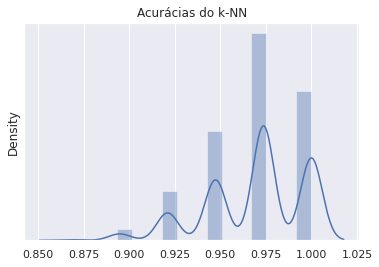

In [31]:
# bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

# remover warnings
import warnings
warnings.filterwarnings("ignore")

# dataset
iris = load_iris()

# caracteristicas e alvo
X = iris.data
y = iris.target

# normalizando
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

scores = []
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    precisao = model.score(X_test,y_test)
    scores.append(precisao)
    
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()